1. Load Processed Data + Best Model

In [15]:
import pandas as pd
import numpy as np
from sklearn.metrics import (
    confusion_matrix, classification_report, roc_auc_score,
    roc_curve, precision_recall_curve
)
import matplotlib.pyplot as plt
import joblib

# Load processed test data
df = pd.read_csv("../data/processed/features.csv")
X = df.drop("Attrition", axis=1)
y = df["Attrition"]

# Train-test split again (same as day 3)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Load best model
model = joblib.load("../models/best_model.pkl")


2. Generate Predictions

In [16]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]


3. Confusion Matrix

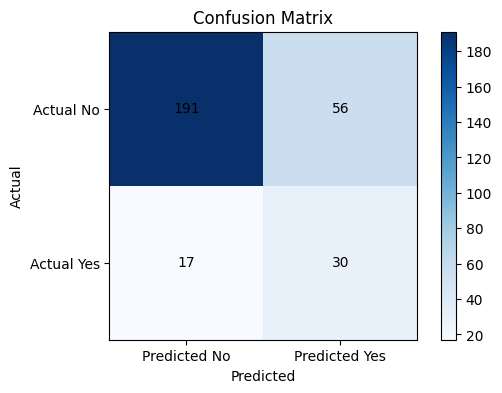

In [17]:
cm = confusion_matrix(y_test, y_pred)
cm
plt.figure(figsize=(6,4))
plt.imshow(cm, cmap="Blues")
plt.title("Confusion Matrix")
plt.colorbar()
plt.xticks([0,1], ["Predicted No", "Predicted Yes"])
plt.yticks([0,1], ["Actual No", "Actual Yes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")

for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha="center", va="center")

import os

os.makedirs("../reports/figures/", exist_ok=True)
plt.savefig("../reports/figures/confusion_matrix.png")
plt.show()


4. Precision, Recall, F1, Classification Report

In [18]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.92      0.77      0.84       247
           1       0.35      0.64      0.45        47

    accuracy                           0.75       294
   macro avg       0.63      0.71      0.65       294
weighted avg       0.83      0.75      0.78       294



5. ROC Curve + AUC

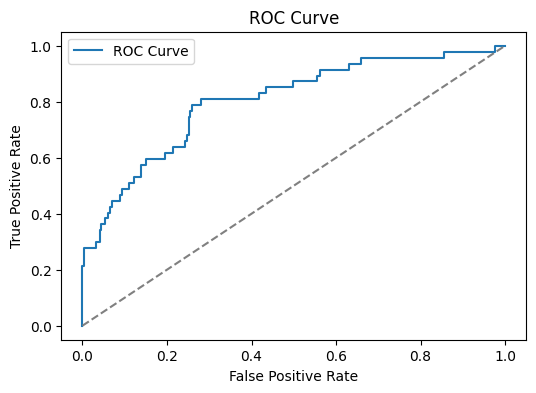

ROC AUC Score: 0.8023946937720733


In [19]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label="ROC Curve")
plt.plot([0,1], [0,1], "--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()

plt.savefig("../reports/figures/roc_curve.png")
plt.show()

print("ROC AUC Score:", roc_auc_score(y_test, y_prob))


6. Precision–Recall Curve

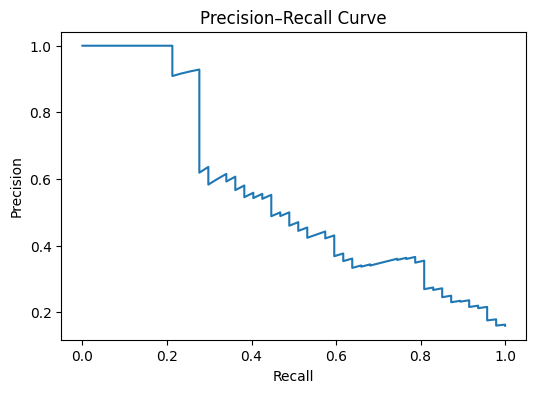

In [20]:
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

plt.figure(figsize=(6,4))
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve")
plt.savefig("../reports/figures/pr_curve.png")
plt.show()


7. Feature Importance (Logistic Regression Coefficients)

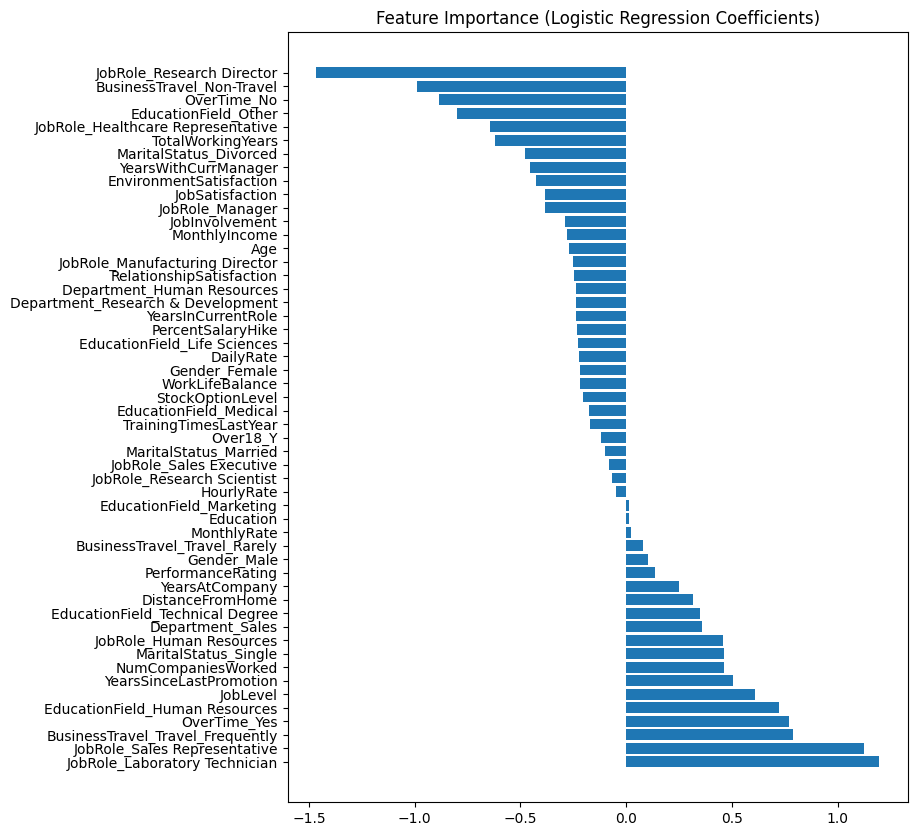

In [ ]:
coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_[0]
}).sort_values(by="Coefficient", ascending=False)

plt.figure(figsize=(8,10))
plt.barh(coef_df["Feature"], coef_df["Coefficient"])
plt.title("Feature Importance (Logistic Regression Coefficients)")
plt.savefig("../reports/figures/feature_importance.png")
plt.show()
